In [62]:
import networkx as nx
from evsim.classes.flowsim_dataset import FlowSimDataset
import matplotlib.colors as mcolors
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [63]:
dataset = FlowSimDataset(
    "/home/isaacp/repos/EvMatsim/contribs/ev/scenario_examples/utah_flow_scenario_example/utahnetwork.xml",
    "/home/isaacp/repos/EvMatsim/contribs/ev/scenario_examples/utah_flow_scenario_example/utahcounts.xml",
    100,
)

In [64]:
cluster_path = "/home/isaacp/repos/EvMatsim/contribs/ev/evsim/gradient_flow_matching/gradient_flow_matching_results/0421153345_nclusters_100_nsamples_1_utahevnetwork/clusters.txt"

In [65]:
clusters = {}

with open(cluster_path, "r") as f:
    for line in f.readlines():
        key,vals = line.strip().split(":")
        vals = vals.split(",")[:-1]
        vals = [dataset.node_mapping[v] for v in vals]
        clusters[key] = vals

clusters

{'0': [846,
  863,
  957,
  958,
  959,
  1786,
  2060,
  2061,
  2319,
  2320,
  2622,
  2623,
  2630,
  2631,
  2632,
  2633,
  2634,
  2635,
  2636,
  2637,
  2638,
  2639,
  2640,
  2641,
  2642,
  2643,
  2644,
  2645,
  2646,
  2647,
  2648,
  2649,
  2673,
  2674,
  2676,
  3301,
  3311,
  3351,
  3352,
  3453,
  3454,
  3463,
  3471,
  3475,
  3476,
  3482,
  3535,
  3540,
  3545,
  3546,
  3547,
  3548,
  3549,
  3568],
 '1': [20,
  358,
  745,
  867,
  868,
  869,
  870,
  1902,
  2312,
  2898,
  2899,
  2900,
  2901,
  2913,
  2947,
  2952,
  2958,
  2965,
  2966,
  2967,
  2982,
  2985,
  2986,
  2999,
  3000,
  3001,
  3002,
  3003,
  3020,
  3021,
  3022,
  3028,
  4045,
  4046,
  4047,
  4048,
  4049,
  4050],
 '2': [2554,
  2594,
  2870,
  2890,
  2891,
  2895,
  2896,
  2897,
  3714,
  3715,
  3716,
  3717,
  3748,
  3749,
  3750,
  3751,
  3752,
  3753,
  3754,
  3925],
 '3': [71,
  123,
  124,
  159,
  160,
  161,
  162,
  164,
  378,
  379,
  383,
  388,
  399,
  63

In [66]:
dataset.target_graph

Data(x=[4235, 1], pos=[4235, 2], edge_index=[2, 5236], edge_attr=[5236, 24])

In [67]:
dataset.target_graph.pos.shape

torch.Size([4235, 2])

In [68]:
edge_idx = dataset.target_graph.edge_index.t().numpy()
pos = dataset.target_graph.pos.numpy()
nx_graph = nx.Graph()
nx_graph.add_edges_from(edge_idx)

In [72]:
print(nx_graph)

Graph with 4235 nodes and 4695 edges


In [69]:
# Generate a list of distinct colors
colors = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())
color_cycle = itertools.cycle(colors)

# Map node -> color
node_color_map = {}

for cluster_id, nodes in clusters.items():
    color = next(color_cycle)
    for node in nodes:
        node_color_map[node] = color

node_colors = [node_color_map.get(node, 'gray') for node in nx_graph.nodes()]

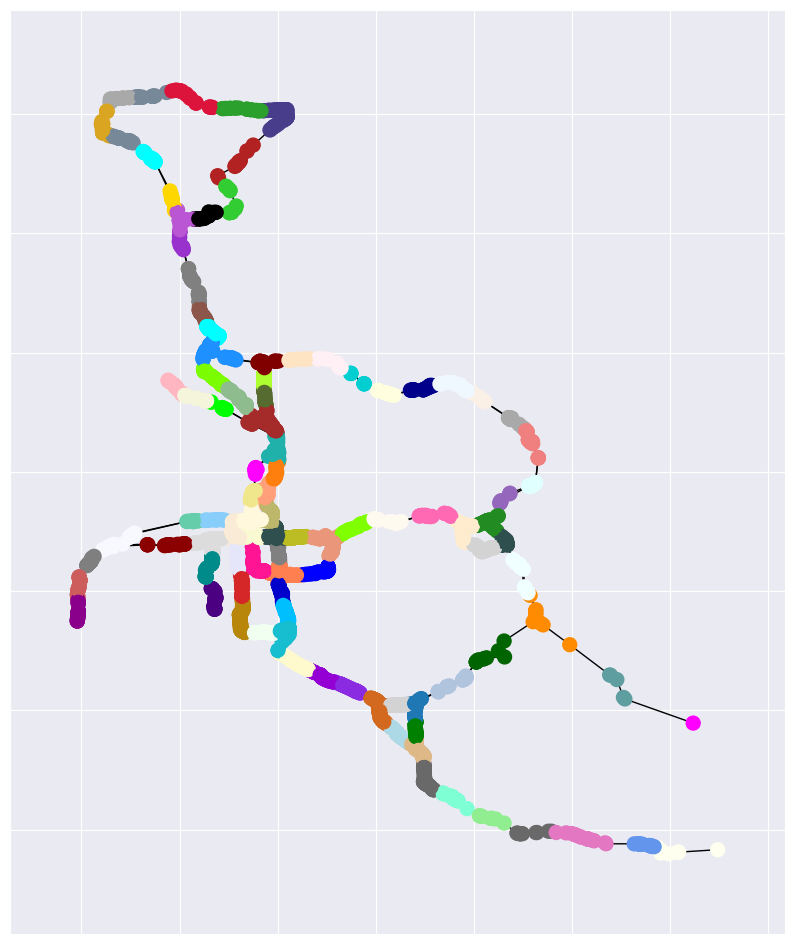

In [71]:

plt.figure(figsize=(10,12))
nx.draw_networkx(nx_graph, pos, with_labels=False, node_color=node_colors, node_size=100)